In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#Read the csv file
bikes=pd.read_csv("day.csv")

In [4]:
#Seeing contents of the file
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Checking shape of the data frame
bikes.shape

(730, 16)

In [7]:
#Checking info of the data frame
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#Checking numerical values of the dataframe
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# INSIGHTS:
Instant is just an index, so it can be removed

dteday can also be removed since we already have year,month and day seperately

cnt=casual+registered , so we can remove casual and registered columns

In [9]:
bikes.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [10]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
bikes.shape

(730, 12)

In [12]:
bikes.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

# INSIGHTS:
We can see that all columns are numerical type

We can see from data dictionary that some variables represent categorical data too

Binary: Year,holiday,workingday

Categorical: season,month,weekday,Weather

Numerical: temp,atemp,humidity,windspeed,cnt

In [13]:
#Renaming columns
bikes.rename(columns={'season':'Season','yr':'Year','mnth':'Month','hum':'Humidity',
                     'weathersit':'Weather','cnt':'Count'}, inplace=True)

In [14]:
#Mapping season coulum
bikes['Season']=bikes['Season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [15]:
bikes.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,Spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
bikes.dtypes

Season         object
Year            int64
Month           int64
holiday         int64
weekday         int64
workingday      int64
Weather         int64
temp          float64
atemp         float64
Humidity      float64
windspeed     float64
Count           int64
dtype: object

In [17]:
bikes['Season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: Season, dtype: int64

In [18]:
#Mapping year variable
bikes['Year']=bikes['Year'].map({0:'2018',1:'2019'})

In [19]:
#Mapping month column
bikes['Month']=bikes['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [20]:
# Checking bikes
bikes.tail()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
725,Spring,2019,December,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,2019,December,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,2019,December,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,2019,December,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796
729,Spring,2019,December,0,2,1,2,8.849153,11.17435,57.7500,10.374682,2729


In [21]:
bikes.dtypes

Season         object
Year           object
Month          object
holiday         int64
weekday         int64
workingday      int64
Weather         int64
temp          float64
atemp         float64
Humidity      float64
windspeed     float64
Count           int64
dtype: object

In [22]:
#Mapping weekday column
bikes['weekday']=bikes['weekday'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

In [23]:
#Mapping Workingday column
bikes['workingday']=bikes['workingday'].map({0:'No',1:'Yes'})

# Weather variable
 1: Clear, Few clouds, Partly cloudy   = Good/Clear
 
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = Moderate/Mist
 
 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  = Bad/Light Rain
 
 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = Worse/Heavy Rain

In [24]:
bikes['Weather']=bikes['Weather'].map({1:'Good/Clear',2:'Moderate/Mist',3:'Bad/Light Rain',4:'Worse/Heavy Rain'})

In [25]:
#Mapping holiday variable
bikes['holiday']=bikes['holiday'].map({0:'No',1:'Yes'})

In [26]:
bikes.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,Spring,2018,January,No,Tuesday,Yes,Moderate/Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,January,No,Wednesday,Yes,Moderate/Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,January,No,Thursday,Yes,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,January,No,Friday,Yes,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,January,No,Saturday,Yes,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600


# Numerical variables

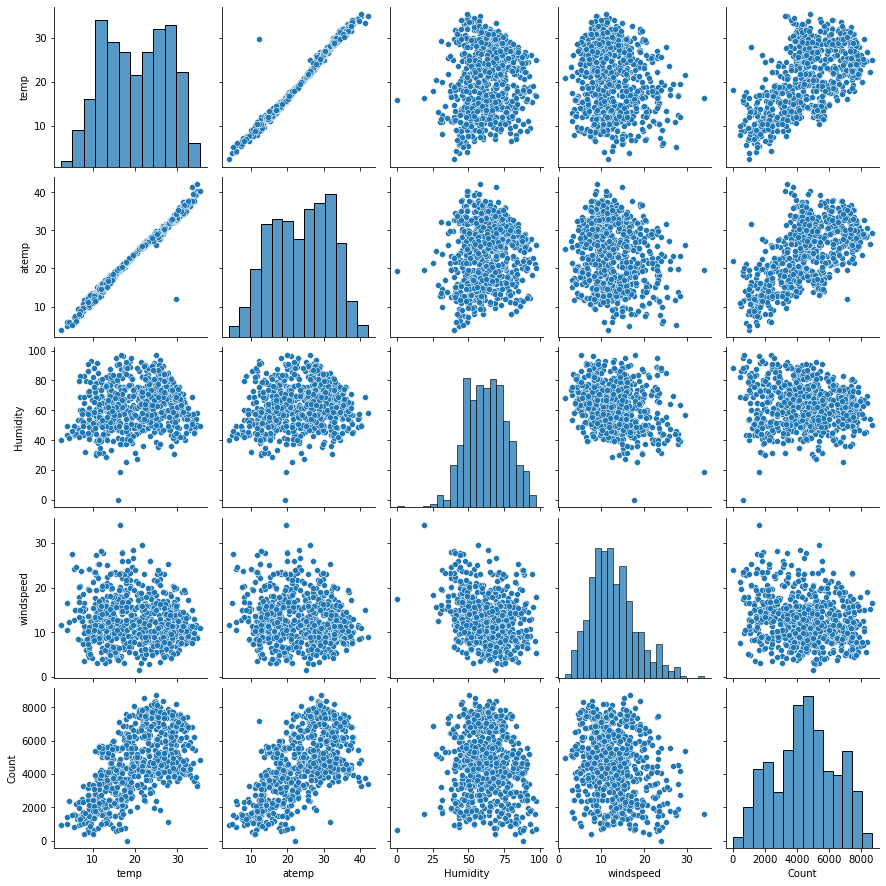

In [27]:
sns.pairplot(bikes)
plt.show()

# INSIGHts:
We can see that temp and atemp have strong correlation with count variable

In [28]:
bikes.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,Spring,2018,January,No,Tuesday,Yes,Moderate/Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,January,No,Wednesday,Yes,Moderate/Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,January,No,Thursday,Yes,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,January,No,Friday,Yes,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,January,No,Saturday,Yes,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600


# UNIVARIATE ANALYSIS

# SEASON UNIVARIATE ANALYSIS

In [29]:
bikes['Season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: Season, dtype: int64

<AxesSubplot:xlabel='Season', ylabel='count'>

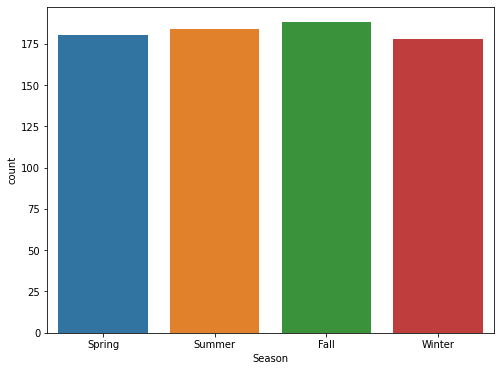

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(bikes['Season'])

# INSIGHTS:
There are more number of bikes in fall season followed by summer and spring
Winter season have least bikes

# YEAR Variable UNIVARIATE ANALYSIS

In [31]:
bikes['Year'].value_counts()

2018    365
2019    365
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

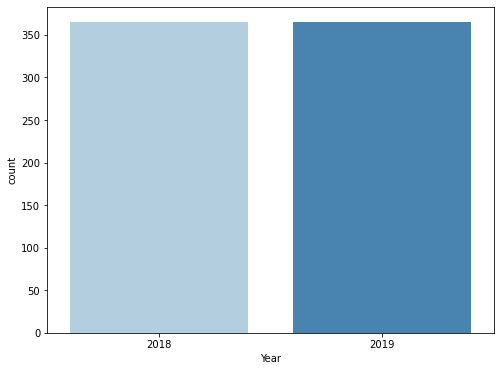

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(bikes['Year'],palette='Blues')

# Insights:
There are equal number of bikes in 2018 and 2019

# MONTH VARIABLE UNIVARIATE ANALYSIS

In [33]:
bikes['Month'].value_counts()

January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: Month, dtype: int64

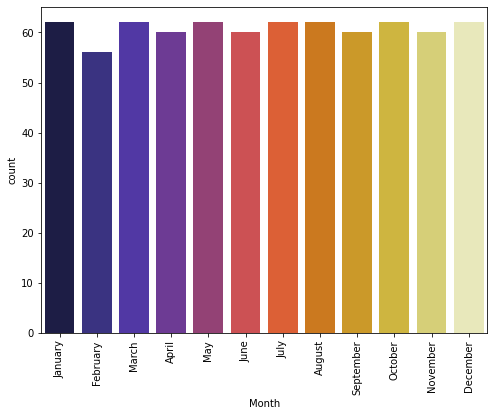

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(bikes['Month'],palette='CMRmap')
plt.xticks(rotation=90)
plt.show()

# INSIGHTS:
All months have similar or close number of bikes.
February has least number of bikes

# Holiday Univariate analysis

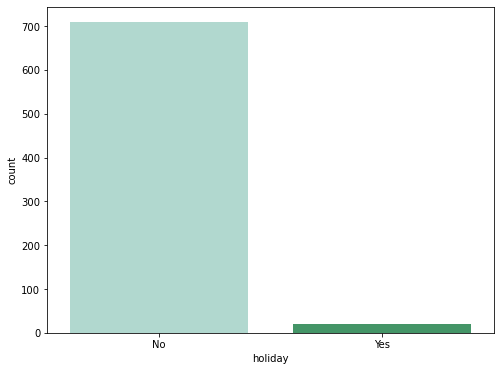

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(bikes['holiday'],palette='BuGn')
plt.show()

# INSIGHTS:
We can see that most of the days are not holidays

# Weekday Univariate analysis

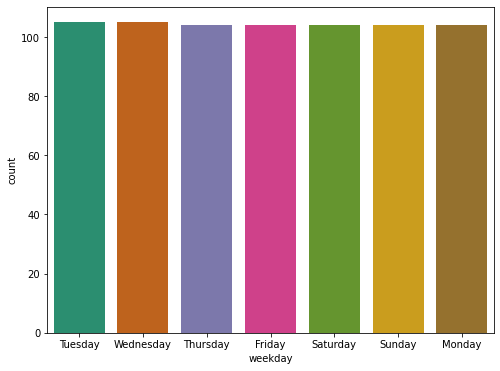

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(bikes['weekday'],palette='Dark2')
plt.show()

# INSIGHTS:
We can see that almost all the days have equal number of bikes

# Weather Univariate analysis

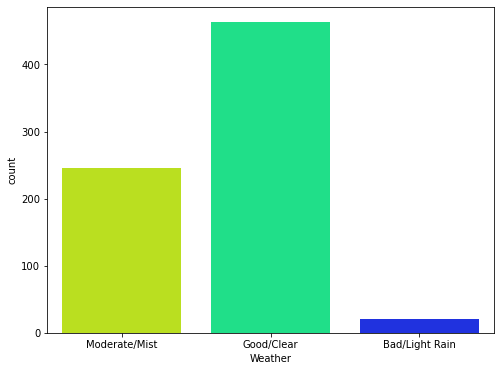

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(bikes['Weather'],palette='gist_rainbow')
plt.show()

# INSIGHTS:
We can see that most bikes are rented during Good/Clear weather

# BIVARIATE ANALYSIS WITH THE TARGET VARIABLE CNT(COUNT)

# SEASON BIVARIATE ANALYSIS

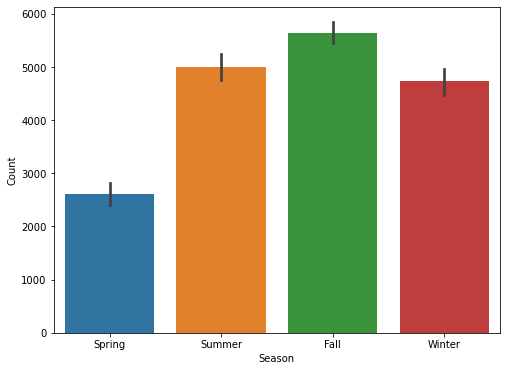

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(bikes['Season'],bikes['Count'])
plt.show()

# INSIGHTS:
We can see that most bikes were rented in Fall followed by Summer and Winter.

Least bikes were rented in spring

# YEAR BIVARIATE ANALYSIS

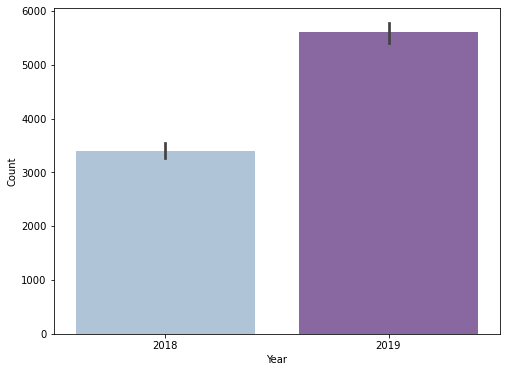

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(bikes['Year'],bikes['Count'],palette='BuPu')
plt.show()

# INSIGHTS:
We can see that more bike were rented in the year 2019

# Month Bivariate Analysis

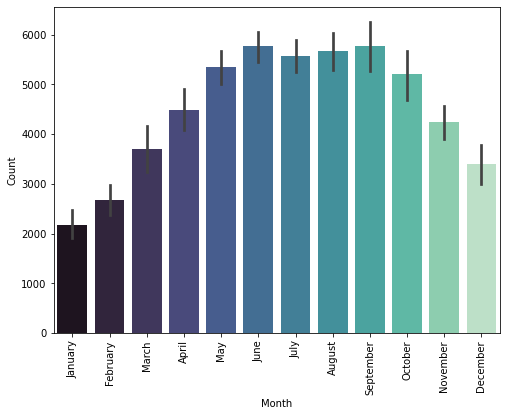

In [40]:
plt.figure(figsize=(8,6))
sns.barplot(bikes['Month'],bikes['Count'],palette='mako')
plt.xticks(rotation=90)
plt.show()

# INSIGHTS:
Most bikes were rented in the month of June and September followed by August and July

In [41]:
bikes.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,Spring,2018,January,No,Tuesday,Yes,Moderate/Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,January,No,Wednesday,Yes,Moderate/Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,January,No,Thursday,Yes,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,January,No,Friday,Yes,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,January,No,Saturday,Yes,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600


# HOLIDAY BIVARIATE ANALYSIS

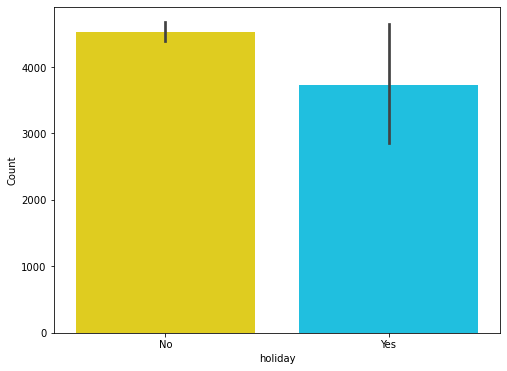

In [42]:
plt.figure(figsize=(8,6))
sns.barplot(bikes['holiday'],bikes['Count'],palette='jet_r')
plt.show()

# INSIGHTS:
Most bikes were rented on Non Holidays

# WEEKDAY BIVARIATE ANALYSIS

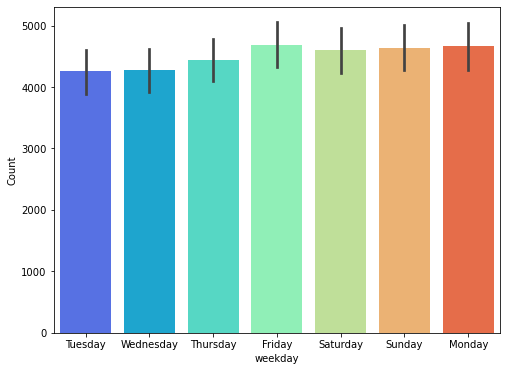

In [43]:
plt.figure(figsize=(8,6))
sns.barplot(bikes['weekday'],bikes['Count'],palette='rainbow')
plt.show()

# INSIGHTS:
Most bikes were rented on Friday, followed by Saturday Sunday and Monday.

# Working day BIVARIATE ANALYSIS

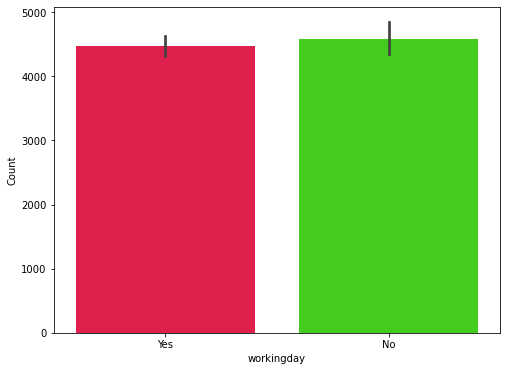

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(bikes['workingday'],bikes['Count'],palette='prism_r')
plt.show()

# INSIGHTS:
There are similar demands whether its working day or not

# Weather Bivariate analysis

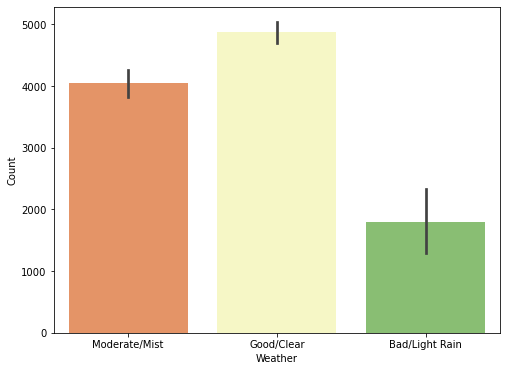

In [45]:
plt.figure(figsize=(8,6))
sns.barplot(bikes['Weather'],bikes['Count'],palette='RdYlGn')
plt.show()

# INSIGHTS:
We can see that most bikes were rented on Good/Clear weather

In [46]:
bikes.dtypes

Season         object
Year           object
Month          object
holiday        object
weekday        object
workingday     object
Weather        object
temp          float64
atemp         float64
Humidity      float64
windspeed     float64
Count           int64
dtype: object

# DATA PREPARATION

In [47]:
# Converting all object types to category type

In [48]:
category=['Season','Year','Month','holiday','weekday','workingday','Weather']
for i in category:
    bikes[i]=bikes[i].astype('category')

In [49]:
bikes.dtypes

Season        category
Year          category
Month         category
holiday       category
weekday       category
workingday    category
Weather       category
temp           float64
atemp          float64
Humidity       float64
windspeed      float64
Count            int64
dtype: object

# Creating dummy variables

In [50]:
dummy=pd.get_dummies(bikes[category],drop_first=True)

In [51]:
dummy

,Season_Spring,Season_Summer,Season_Winter,Year_2019,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Mist
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
726,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
727,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
728,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0


# Combining both bike data frame and dummy variables

In [52]:
bike=pd.concat([bikes,dummy],axis=1)

In [53]:
bike.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count,Season_Spring,Season_Summer,Season_Winter,Year_2019,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Mist
0,Spring,2018,January,No,Tuesday,Yes,Moderate/Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,Spring,2018,January,No,Wednesday,Yes,Moderate/Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,Spring,2018,January,No,Thursday,Yes,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,Spring,2018,January,No,Friday,Yes,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,Spring,2018,January,No,Saturday,Yes,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


# Dropping columns from which dummy variables were created

In [54]:
bike.drop(category,axis=1,inplace=True)

In [55]:
bike.head()

,temp,atemp,Humidity,windspeed,Count,Season_Spring,Season_Summer,Season_Winter,Year_2019,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Mist
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [56]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temp                   730 non-null    float64
 1   atemp                  730 non-null    float64
 2   Humidity               730 non-null    float64
 3   windspeed              730 non-null    float64
 4   Count                  730 non-null    int64  
 5   Season_Spring          730 non-null    uint8  
 6   Season_Summer          730 non-null    uint8  
 7   Season_Winter          730 non-null    uint8  
 8   Year_2019              730 non-null    uint8  
 9   Month_August           730 non-null    uint8  
 10  Month_December         730 non-null    uint8  
 11  Month_February         730 non-null    uint8  
 12  Month_January          730 non-null    uint8  
 13  Month_July             730 non-null    uint8  
 14  Month_June             730 non-null    uint8  
 15  Month_

# We have 30 columns now. We can start building the model now

# We will divide dataset into train and test

In [57]:
#importing statsmodel and sklearn libraries for linear regression
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [58]:
# Creating train and test data
df_train,df_test=train_test_split(bike,train_size=0.8,test_size=0.2,random_state=100)

In [59]:
#Verifying the column and rows
print(df_train.shape)
print(df_test.shape)

(584, 30)
(146, 30)


In [60]:
df_train.head()

,temp,atemp,Humidity,windspeed,Count,Season_Spring,Season_Summer,Season_Winter,Year_2019,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Mist
367,6.150000,6.31375,44.1250,24.499957,2236,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
648,17.835000,21.55835,46.3333,12.166932,7570,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
44,17.015000,19.91750,37.5833,27.999836,1913,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
705,13.154153,16.09790,76.4167,8.750200,5008,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
379,6.833347,8.08125,41.9167,16.834286,2311,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0


In [61]:
df_test.head()

,temp,atemp,Humidity,windspeed,Count,Season_Spring,Season_Summer,Season_Winter,Year_2019,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Mist
184,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
535,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
299,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
221,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
152,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


# Rescaling the features using MaxMin Scaling

In [62]:
#importing MaxMin scaler
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler=MinMaxScaler()

In [64]:
bike.columns

Index(['temp', 'atemp', 'Humidity', 'windspeed', 'Count', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Year_2019', 'Month_August', 'Month_December', 'Month_February', 'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May', 'Month_November', 'Month_October', 'Month_September', 'holiday_Yes', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'workingday_Yes', 'Weather_Good/Clear', 'Weather_Moderate/Mist'], dtype='object')

In [65]:
# Performing scaling on all numerical variables
num_vars=['temp','atemp','Humidity','windspeed','Count']

In [66]:
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [67]:
df_train[num_vars].head()

,temp,atemp,Humidity,windspeed,Count
367,0.113228,0.061963,0.454701,0.695175,0.254717
648,0.468352,0.462175,0.477458,0.299450,0.868385
44,0.443431,0.419099,0.387290,0.807474,0.217556
705,0.326094,0.318824,0.787463,0.189819,0.573631
379,0.133996,0.108365,0.431945,0.449210,0.263346


In [68]:
df_train.head()

,temp,atemp,Humidity,windspeed,Count,Season_Spring,Season_Summer,Season_Winter,Year_2019,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Mist
367,0.113228,0.061963,0.454701,0.695175,0.254717,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
648,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
44,0.443431,0.419099,0.387290,0.807474,0.217556,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
705,0.326094,0.318824,0.787463,0.189819,0.573631,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
379,0.133996,0.108365,0.431945,0.449210,0.263346,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0


In [69]:
df_train.describe()

,temp,atemp,Humidity,windspeed,Count,Season_Spring,Season_Summer,Season_Winter,Year_2019,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Mist
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.537414,0.513175,0.649499,0.319463,0.515792,0.251712,0.246575,0.250000,0.513699,0.090753,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,0.087329,0.080479,0.092466,0.080479,0.027397,0.130137,0.152397,0.119863,0.136986,0.155822,0.159247,0.726027,0.630137,0.342466
std,0.225336,0.211663,0.144219,0.168114,0.225336,0.434369,0.431387,0.433384,0.500241,0.287504,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,0.282558,0.272267,0.289931,0.272267,0.163378,0.336743,0.359714,0.325080,0.344128,0.362997,0.366220,0.446377,0.483181,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340113,0.331819,0.535852,0.199177,0.350696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.545191,0.530558,0.653714,0.294764,0.522837,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.736512,0.690521,0.752361,0.410413,0.691872,1.000000,0.000000,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


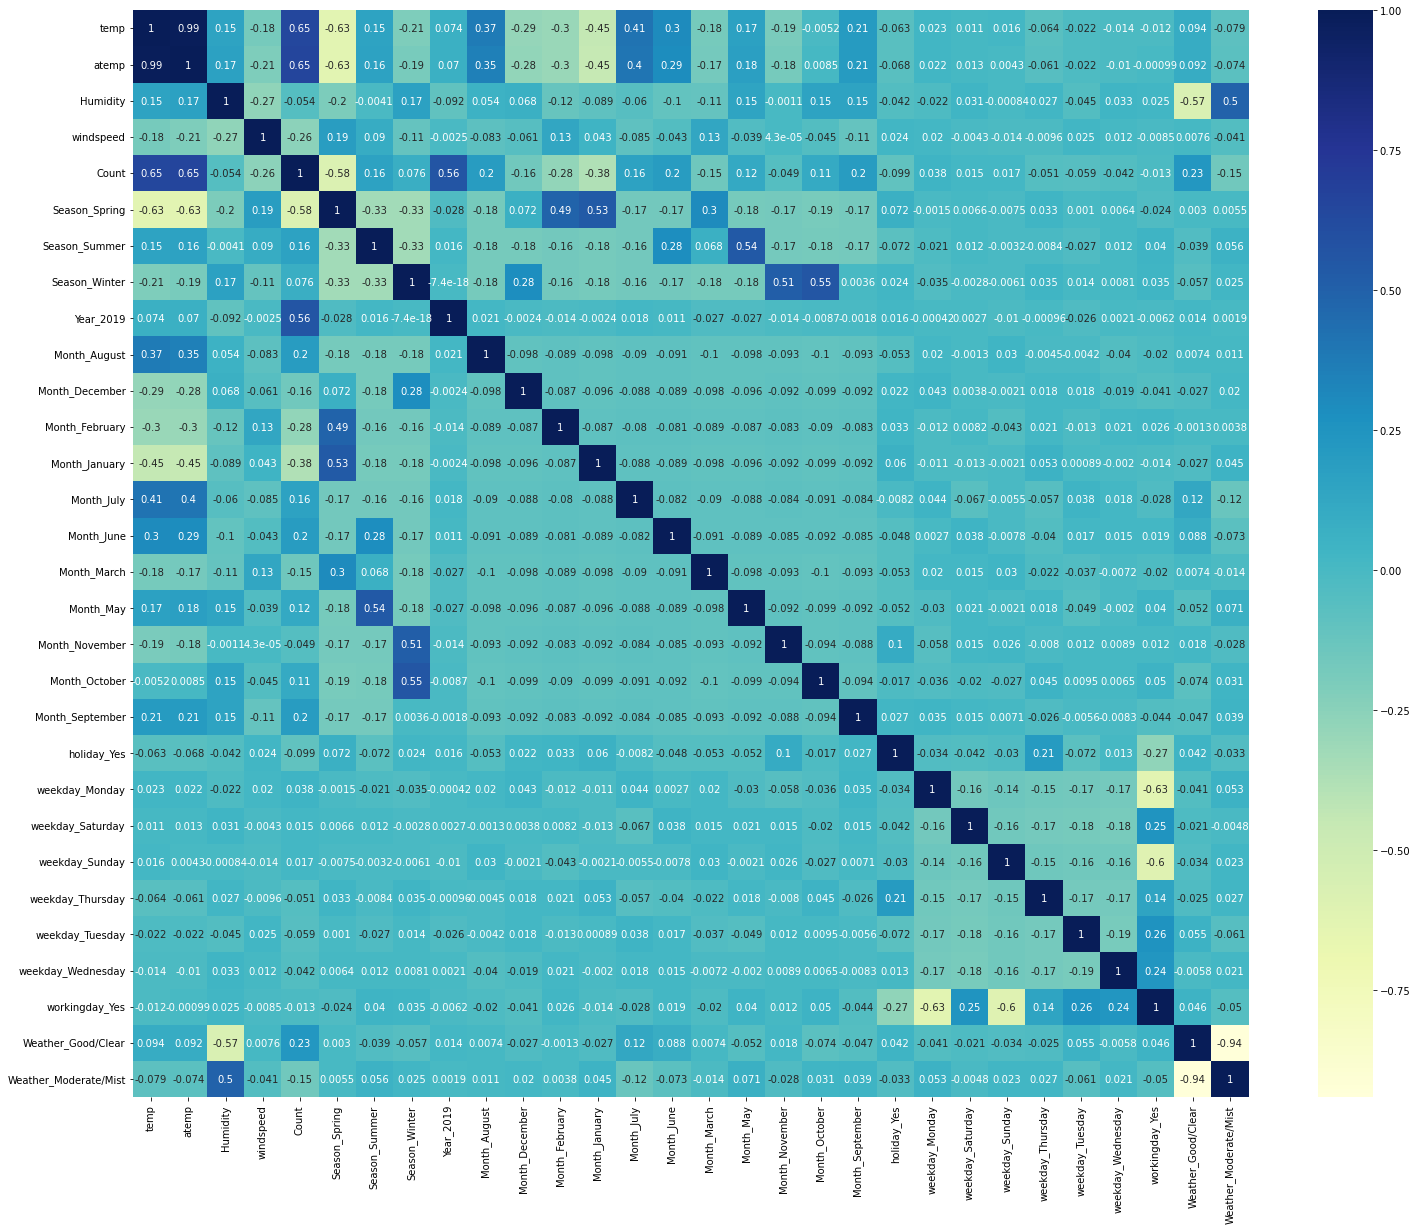

In [70]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# There is good correlation between temp and count

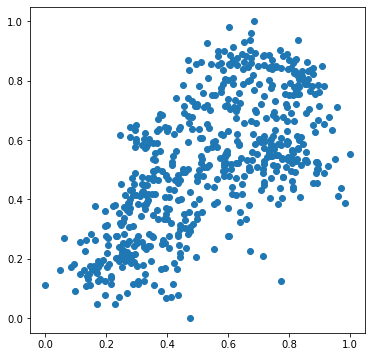

In [71]:
# Plotting a scatter chart between temp and count variable
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.Count)
plt.show()

# Model Building 

In [72]:
# Dividing training set into X_train and y_train for model building
y_train=df_train.pop('Count')
X_train=df_train

In [73]:
y_train.head()

367    0.254717
648    0.868385
44     0.217556
705    0.573631
379    0.263346
Name: Count, dtype: float64

In [74]:
X_train.head()

,temp,atemp,Humidity,windspeed,Season_Spring,Season_Summer,Season_Winter,Year_2019,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Mist
367,0.113228,0.061963,0.454701,0.695175,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
648,0.468352,0.462175,0.477458,0.299450,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
44,0.443431,0.419099,0.387290,0.807474,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
705,0.326094,0.318824,0.787463,0.189819,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
379,0.133996,0.108365,0.431945,0.449210,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0


In [75]:
X_train.shape

(584, 29)

In [76]:
y_train.shape

(584,)

In [77]:
# Importing RFE library for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [78]:
# Using RFE for feature selection and we will limit selection to 15 variables
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [79]:
# Creating a list of features created by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 3),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('Season_Spring', True, 1),
 ('Season_Summer', True, 1),
 ('Season_Winter', True, 1),
 ('Year_2019', True, 1),
 ('Month_August', False, 11),
 ('Month_December', True, 1),
 ('Month_February', False, 2),
 ('Month_January', True, 1),
 ('Month_July', True, 1),
 ('Month_June', False, 12),
 ('Month_March', False, 14),
 ('Month_May', False, 9),
 ('Month_November', True, 1),
 ('Month_October', False, 13),
 ('Month_September', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Monday', False, 6),
 ('weekday_Saturday', False, 15),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 10),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 8),
 ('workingday_Yes', False, 4),
 ('Weather_Good/Clear', True, 1),
 ('Weather_Moderate/Mist', True, 1)]

In [80]:
# Features not chosen by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'Month_August', 'Month_February', 'Month_June', 'Month_March', 'Month_May', 'Month_October', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'workingday_Yes'], dtype='object')

In [81]:
# Creating list of RFE selected features and storing it
rfe_col=X_train.columns[rfe.support_]


In [82]:
rfe_col

Index(['temp', 'Humidity', 'windspeed', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Year_2019', 'Month_December', 'Month_January', 'Month_July', 'Month_November', 'Month_September', 'holiday_Yes', 'Weather_Good/Clear', 'Weather_Moderate/Mist'], dtype='object')

In [83]:
# Creating a new data frame with RFE selected features
X_train_rfe=X_train[rfe_col]

In [84]:
X_train_rfe.head()

,temp,Humidity,windspeed,Season_Spring,Season_Summer,Season_Winter,Year_2019,Month_December,Month_January,Month_July,Month_November,Month_September,holiday_Yes,Weather_Good/Clear,Weather_Moderate/Mist
367,0.113228,0.454701,0.695175,1,0,0,1,0,1,0,0,0,0,1,0
648,0.468352,0.477458,0.299450,0,0,1,1,0,0,0,0,0,0,1,0
44,0.443431,0.387290,0.807474,1,0,0,0,0,0,0,0,0,0,1,0
705,0.326094,0.787463,0.189819,0,0,1,1,1,0,0,0,0,0,0,1
379,0.133996,0.431945,0.449210,1,0,0,1,0,1,0,0,0,0,1,0


# Now we will start creating the models

# Model 1

In [85]:
# Adding constant for y intercept
X_train_rfe=sm.add_constant(X_train_rfe)

In [86]:
# Build a model
lr=sm.OLS(y_train,X_train_rfe)

In [87]:
# Fit the model
lr_model=lr.fit()

In [88]:
#params
lr_model.params

const                    0.067074
temp                     0.484328
Humidity                -0.156898
windspeed               -0.182183
Season_Spring           -0.070631
Season_Summer            0.040442
Season_Winter            0.109176
Year_2019                0.227581
Month_December          -0.045325
Month_January           -0.041400
Month_July              -0.054872
Month_November          -0.054605
Month_September          0.066309
holiday_Yes             -0.093285
Weather_Good/Clear       0.251037
Weather_Moderate/Mist    0.196451
dtype: float64

In [89]:
#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          9.71e-222
Time:                        21:13:29   Log-Likelihood:                 594.34
No. Observations:                 584   AIC:                            -1157.
Df Residuals:                     568   BIC:                            -1087.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0671      0.045      1.478      0.140      -0.022       0.156
temp                      0.4843      0.034     14.101      0.000       0.417       0.552
Humidity                 -0.1569      0.036     -4.399      0.000      -0.227      -0.087
windspeed                -0.1822      0.024     -7.606      0.000      -0.229      -0.135
Season_Spring            -0.0706      0.020     -3.598      0.000      -0.109      -0.032
Season_Summer             0.0404      0.014      2.868      0.004       0.013       0.068
Season_Winter             0.1092      0.016      6.761      0.000       0.077       0.141
Year_2019                 0.2276      0.007     30.460      0.000       0.213       0.242
Month_December           -0.0453      0.016     -2.879      0.004      -0.076      -0.014
Month_January            -0.0414      0.017     -2.489      0.013      -0.074      -0.009
Month_July               -0.0549      0.017     -3.212      0.001      -0.088      -0.021
Month_November           -0.0546      0.018     -3.119      0.002      -0.089      -0.020
Month_September           0.0663      0.016      4.266      0.000       0.036       0.097
holiday_Yes              -0.0933      0.023     -4.089      0.000      -0.138      -0.048
Weather_Good/Clear        0.2510      0.025      9.970      0.000       0.202       0.300
Weather_Moderate/Mist     0.1965      0.024      8.246      0.000       0.150       0.243
==============================================================================
Omnibus:                       87.012   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.812
Skew:                          -0.764   Prob(JB):                     6.82e-49
Kurtosis:                       5.604   Cond. No.                         26.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# Importing library to check VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [91]:
#Creating a data frame that will contain all the features and their respective vif values
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

In [92]:
vif

,Features,VIF
0,const,152.94
14,Weather_Good/Clear,10.97
15,Weather_Moderate/Mist,9.49
4,Season_Spring,5.39
1,temp,4.44
6,Season_Winter,3.63
5,Season_Summer,2.74
2,Humidity,1.96
11,Month_November,1.68
9,Month_January,1.64


# We will remove Weather_Moderate/Mist because it has very high VIF value. Even Weather_Good/Clear has high VIF but we will keep it for now as it is more important for our model

# Model 2

In [93]:
X_train_rfe2=X_train_rfe.drop('Weather_Moderate/Mist',axis=1)

In [94]:
X_train_rfe2.head()

,const,temp,Humidity,windspeed,Season_Spring,Season_Summer,Season_Winter,Year_2019,Month_December,Month_January,Month_July,Month_November,Month_September,holiday_Yes,Weather_Good/Clear
367,1.0,0.113228,0.454701,0.695175,1,0,0,1,0,1,0,0,0,0,1
648,1.0,0.468352,0.477458,0.299450,0,0,1,1,0,0,0,0,0,0,1
44,1.0,0.443431,0.387290,0.807474,1,0,0,0,0,0,0,0,0,0,1
705,1.0,0.326094,0.787463,0.189819,0,0,1,1,1,0,0,0,0,0,0
379,1.0,0.133996,0.431945,0.449210,1,0,0,1,0,1,0,0,0,0,1


In [95]:
# Add a constant
X_train_rfe2=sm.add_constant(X_train_rfe2)

In [96]:
#Building model
lr2=sm.OLS(y_train,X_train_rfe2)

In [97]:
# Fit the model
lr_model=lr2.fit()

In [98]:
#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     199.9
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          5.19e-209
Time:                        21:13:29   Log-Likelihood:                 561.32
No. Observations:                 584   AIC:                            -1093.
Df Residuals:                     569   BIC:                            -1027.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2816      0.039      7.162      0.000       0.204       0.359
temp                   0.5100      0.036     14.102      0.000       0.439       0.581
Humidity              -0.2116      0.037     -5.712      0.000      -0.284      -0.139
windspeed             -0.2135      0.025     -8.537      0.000      -0.263      -0.164
Season_Spring         -0.0637      0.021     -3.073      0.002      -0.104      -0.023
Season_Summer          0.0472      0.015      3.172      0.002       0.018       0.076
Season_Winter          0.1088      0.017      6.374      0.000       0.075       0.142
Year_2019              0.2283      0.008     28.910      0.000       0.213       0.244
Month_December        -0.0390      0.017     -2.347      0.019      -0.072      -0.006
Month_January         -0.0313      0.018     -1.787      0.074      -0.066       0.003
Month_July            -0.0619      0.018     -3.432      0.001      -0.097      -0.026
Month_November        -0.0492      0.018     -2.659      0.008      -0.086      -0.013
Month_September        0.0664      0.016      4.043      0.000       0.034       0.099
holiday_Yes           -0.0898      0.024     -3.722      0.000      -0.137      -0.042
Weather_Good/Clear     0.0596      0.010      5.781      0.000       0.039       0.080
==============================================================================
Omnibus:                      115.254   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.579
Skew:                          -0.947   Prob(JB):                     1.83e-74
Kurtosis:                       6.220   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
#Creating a data frame that will contain all the features and their respective vif values
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values,i) for i in range(X_train_rfe2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

In [100]:
vif

,Features,VIF
0,const,102.69
4,Season_Spring,5.38
1,temp,4.40
6,Season_Winter,3.63
5,Season_Summer,2.73
2,Humidity,1.89
11,Month_November,1.68
14,Weather_Good/Clear,1.65
9,Month_January,1.63
10,Month_July,1.51


# We will remove Season_Spring as it has a high VIF value

# Model 3

In [101]:
X_train_rfe3=X_train_rfe2.drop('Season_Spring',axis=1)

In [102]:
X_train_rfe3.head()

,const,temp,Humidity,windspeed,Season_Summer,Season_Winter,Year_2019,Month_December,Month_January,Month_July,Month_November,Month_September,holiday_Yes,Weather_Good/Clear
367,1.0,0.113228,0.454701,0.695175,0,0,1,0,1,0,0,0,0,1
648,1.0,0.468352,0.477458,0.299450,0,1,1,0,0,0,0,0,0,1
44,1.0,0.443431,0.387290,0.807474,0,0,0,0,0,0,0,0,0,1
705,1.0,0.326094,0.787463,0.189819,0,1,1,1,0,0,0,0,0,0
379,1.0,0.133996,0.431945,0.449210,0,0,1,0,1,0,0,0,0,1


In [103]:
#Adding constant
X_train_rfe3=sm.add_constant(X_train_rfe3)

In [104]:
#Build the model
lr3=sm.OLS(y_train,X_train_rfe3)

In [105]:
#Fit the model
lr3_model=lr3.fit()

In [106]:
#params
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          3.71e-208
Time:                        21:13:29   Log-Likelihood:                 556.51
No. Observations:                 584   AIC:                            -1085.
Df Residuals:                     570   BIC:                            -1024.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2149      0.033      6.507      0.000       0.150       0.280
temp                   0.5869      0.026     22.315      0.000       0.535       0.639
Humidity              -0.2210      0.037     -5.941      0.000      -0.294      -0.148
windspeed             -0.2198      0.025     -8.757      0.000      -0.269      -0.171
Season_Summer          0.0786      0.011      7.202      0.000       0.057       0.100
Season_Winter          0.1449      0.012     11.606      0.000       0.120       0.169
Year_2019              0.2267      0.008     28.556      0.000       0.211       0.242
Month_December        -0.0328      0.017     -1.976      0.049      -0.065      -0.000
Month_January         -0.0342      0.018     -1.941      0.053      -0.069       0.000
Month_July            -0.0509      0.018     -2.859      0.004      -0.086      -0.016
Month_November        -0.0377      0.018     -2.068      0.039      -0.074      -0.002
Month_September        0.0812      0.016      5.131      0.000       0.050       0.112
holiday_Yes           -0.0939      0.024     -3.871      0.000      -0.142      -0.046
Weather_Good/Clear     0.0571      0.010      5.515      0.000       0.037       0.077
==============================================================================
Omnibus:                      104.887   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.651
Skew:                          -0.910   Prob(JB):                     4.60e-59
Kurtosis:                       5.779   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
#Creating a data frame that will contain all the features and their respective vif values
vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

In [108]:
vif

,Features,VIF
0,const,71.39
1,temp,2.30
5,Season_Winter,1.91
2,Humidity,1.88
13,Weather_Good/Clear,1.64
8,Month_January,1.62
10,Month_November,1.61
4,Season_Summer,1.45
9,Month_July,1.45
7,Month_December,1.44


# We will remove Month_January as it has a high P value

# MODEL 4

In [109]:
X_train_rfe4=X_train_rfe3.drop('Month_January',axis=1)

In [110]:
# Adding constant
X_train_rfe4=sm.add_constant(X_train_rfe4)

In [111]:
#Building model
lr4=sm.OLS(y_train,X_train_rfe4)

In [112]:
#Fitting the model
lr4_model=lr4.fit()

In [113]:
#Summary
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     227.6
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          1.56e-208
Time:                        21:13:30   Log-Likelihood:                 554.59
No. Observations:                 584   AIC:                            -1083.
Df Residuals:                     571   BIC:                            -1026.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1974      0.032      6.198      0.000       0.135       0.260
temp                   0.6125      0.023     26.876      0.000       0.568       0.657
Humidity              -0.2265      0.037     -6.091      0.000      -0.299      -0.153
windspeed             -0.2157      0.025     -8.604      0.000      -0.265      -0.166
Season_Summer          0.0838      0.011      7.903      0.000       0.063       0.105
Season_Winter          0.1503      0.012     12.318      0.000       0.126       0.174
Year_2019              0.2257      0.008     28.422      0.000       0.210       0.241
Month_December        -0.0238      0.016     -1.487      0.138      -0.055       0.008
Month_July            -0.0521      0.018     -2.920      0.004      -0.087      -0.017
Month_November        -0.0323      0.018     -1.788      0.074      -0.068       0.003
Month_September        0.0834      0.016      5.266      0.000       0.052       0.114
holiday_Yes           -0.0961      0.024     -3.958      0.000      -0.144      -0.048
Weather_Good/Clear     0.0563      0.010      5.429      0.000       0.036       0.077
==============================================================================
Omnibus:                      100.644   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.287
Skew:                          -0.884   Prob(JB):                     2.71e-55
Kurtosis:                       5.683   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
#Creating a data frame that will contain all the features and their respective vif values
vif=pd.DataFrame()
vif['Features']=X_train_rfe4.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe4.values,i) for i in range(X_train_rfe4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

In [115]:
vif

,Features,VIF
0,const,66.12
2,Humidity,1.87
5,Season_Winter,1.82
1,temp,1.72
12,Weather_Good/Clear,1.63
9,Month_November,1.58
8,Month_July,1.45
4,Season_Summer,1.36
7,Month_December,1.33
10,Month_September,1.21


# We will remove Month_November as it has high p value

# Model 5

In [116]:
X_Train_rfe5=X_train_rfe4.drop('Month_November',axis=1)

In [117]:
# Adding constant
X_Train_rfe5=sm.add_constant(X_Train_rfe5)

In [118]:
#Build the model
lr5=sm.OLS(y_train,X_Train_rfe5)

In [119]:
#Fit the model
lr5_model=lr5.fit()

In [120]:
#params
lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     247.1
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          4.75e-209
Time:                        21:13:30   Log-Likelihood:                 552.96
No. Observations:                 584   AIC:                            -1082.
Df Residuals:                     572   BIC:                            -1029.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1938      0.032      6.085      0.000       0.131       0.256
temp                   0.6182      0.023     27.340      0.000       0.574       0.663
Humidity              -0.2257      0.037     -6.061      0.000      -0.299      -0.153
windspeed             -0.2162      0.025     -8.606      0.000      -0.266      -0.167
Season_Summer          0.0841      0.011      7.915      0.000       0.063       0.105
Season_Winter          0.1387      0.010     13.396      0.000       0.118       0.159
Year_2019              0.2259      0.008     28.387      0.000       0.210       0.242
Month_December        -0.0144      0.015     -0.949      0.343      -0.044       0.015
Month_July            -0.0531      0.018     -2.971      0.003      -0.088      -0.018
Month_September        0.0861      0.016      5.454      0.000       0.055       0.117
holiday_Yes           -0.1009      0.024     -4.169      0.000      -0.148      -0.053
Weather_Good/Clear     0.0556      0.010      5.356      0.000       0.035       0.076
==============================================================================
Omnibus:                       97.409   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.668
Skew:                          -0.868   Prob(JB):                     6.69e-52
Kurtosis:                       5.582   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
#Creating a data frame that will contain all the features and their respective vif values
vif=pd.DataFrame()
vif['Features']=X_Train_rfe5.columns
vif['VIF']=[variance_inflation_factor(X_Train_rfe5.values,i) for i in range(X_Train_rfe5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

In [122]:
vif

,Features,VIF
0,const,65.85
2,Humidity,1.87
1,temp,1.68
11,Weather_Good/Clear,1.63
8,Month_July,1.44
4,Season_Summer,1.36
5,Season_Winter,1.30
9,Month_September,1.20
7,Month_December,1.18
3,windspeed,1.16


# We will be removing Month_December since it has high P value

# Model 6

In [123]:
X_train_rfe6=X_Train_rfe5.drop('Month_December',axis=1)

In [124]:
# Adding a constant
X_train_rfe6=sm.add_constant(X_train_rfe6)

In [125]:
# Build a model
lr6=sm.OLS(y_train,X_train_rfe6)

In [126]:
#Fit the model
lr6_model=lr6.fit()

In [127]:
#params
lr6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     271.8
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          4.40e-210
Time:                        21:13:30   Log-Likelihood:                 552.50
No. Observations:                 584   AIC:                            -1083.
Df Residuals:                     573   BIC:                            -1035.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1923      0.032      6.045      0.000       0.130       0.255
temp                   0.6231      0.022     28.285      0.000       0.580       0.666
Humidity              -0.2290      0.037     -6.173      0.000      -0.302      -0.156
windspeed             -0.2148      0.025     -8.566      0.000      -0.264      -0.166
Season_Summer          0.0847      0.011      7.999      0.000       0.064       0.106
Season_Winter          0.1370      0.010     13.443      0.000       0.117       0.157
Year_2019              0.2257      0.008     28.373      0.000       0.210       0.241
Month_July            -0.0535      0.018     -2.997      0.003      -0.089      -0.018
Month_September        0.0871      0.016      5.530      0.000       0.056       0.118
holiday_Yes           -0.1009      0.024     -4.170      0.000      -0.148      -0.053
Weather_Good/Clear     0.0551      0.010      5.312      0.000       0.035       0.075
==============================================================================
Omnibus:                       95.952   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.016
Skew:                          -0.861   Prob(JB):                     1.86e-50
Kurtosis:                       5.539   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
#Creating a data frame that will contain all the features and their respective vif values
vif=pd.DataFrame()
vif['Features']=X_Train_rfe5.columns
vif['VIF']=[variance_inflation_factor(X_Train_rfe5.values,i) for i in range(X_Train_rfe5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

In [129]:
vif

,Features,VIF
0,const,65.85
2,Humidity,1.87
1,temp,1.68
11,Weather_Good/Clear,1.63
8,Month_July,1.44
4,Season_Summer,1.36
5,Season_Winter,1.30
9,Month_September,1.20
7,Month_December,1.18
3,windspeed,1.16


# This model looks good as both VIF and P values are in range

# Residual Analysis

In [130]:
y_train_pred=lr6_model.predict(X_train_rfe6)

In [131]:
#residual calculations
res=y_train-y_train_pred

Text(0.5, 0, 'Errors')

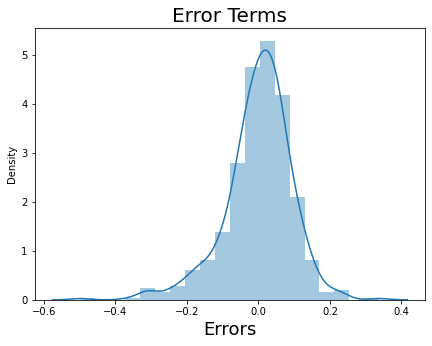

In [132]:
# Plotiing the error terms
plt.figure(figsize=(7,5))
sns.distplot(res,bins=20)
plt.title('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)          

# Residuals are normally distributed

# Making predictions using final model

In [133]:
# Scaling test data
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [134]:
df_test.head()

,temp,atemp,Humidity,windspeed,Count,Season_Spring,Season_Summer,Season_Winter,Year_2019,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Mist
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
535,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
221,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
152,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [135]:
# Checking numerical values
df_test.describe()

,temp,atemp,Humidity,windspeed,Count,Season_Spring,Season_Summer,Season_Winter,Year_2019,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Mist
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.569603,0.542752,0.635933,0.315127,0.517368,0.226027,0.273973,0.219178,0.445205,0.061644,0.075342,0.089041,0.075342,0.123288,0.102740,0.061644,0.075342,0.089041,0.054795,0.089041,0.034247,0.191781,0.102740,0.232877,0.164384,0.095890,0.082192,0.547945,0.650685,0.315068
std,0.238088,0.222120,0.156357,0.161524,0.212757,0.419697,0.447530,0.415114,0.498699,0.241335,0.264852,0.285783,0.264852,0.329899,0.304664,0.241335,0.264852,0.285783,0.228362,0.285783,0.182488,0.395057,0.304664,0.424119,0.371899,0.295454,0.275602,0.499409,0.478395,0.466142
min,0.046591,0.025950,0.261915,-0.042808,0.055683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.359075,0.346732,0.534457,0.196160,0.391251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.560248,0.544652,0.614856,0.306383,0.508916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.801929,0.743337,0.730570,0.411976,0.649994,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,0.984424,0.980934,1.002146,0.800793,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
# Dividing test set into x test and y test
y_test=df_test.pop('Count')
X_test=df_test

In [137]:
#Columns that we used for our model
col=X_train_rfe6.columns

In [138]:
col

Index(['const', 'temp', 'Humidity', 'windspeed', 'Season_Summer', 'Season_Winter', 'Year_2019', 'Month_July', 'Month_September', 'holiday_Yes', 'Weather_Good/Clear'], dtype='object')

In [139]:
# Adding constant
X_test=sm.add_constant(X_test)

In [140]:
#Using columns which are used in the model chosen
X_test=X_test[col]

In [141]:
X_test.head()

,const,temp,Humidity,windspeed,Season_Summer,Season_Winter,Year_2019,Month_July,Month_September,holiday_Yes,Weather_Good/Clear
184,1.0,0.831783,0.657364,0.084219,0,0,0,1,0,1,0
535,1.0,0.901354,0.610133,0.153728,1,0,1,0,0,0,1
299,1.0,0.511964,0.837699,0.334206,0,1,0,0,0,0,0
221,1.0,0.881625,0.437098,0.339570,0,0,0,0,0,0,1
152,1.0,0.817246,0.314298,0.537414,1,0,0,0,0,0,1


In [142]:
Making predictiobs
y_test_pred=lr6_model.predict(X_test)

# Calculating Rsquare values

In [143]:
from sklearn.metrics import r2_score

In [144]:
r2_train=r2_score(y_true=y_train,y_pred=y_train_pred)

In [145]:
r2_train

0.8258685201309017

In [146]:
r2_test=r2_score(y_true=y_test,y_pred=y_test_pred)
r2_test

0.7744886374666305

# The final equation for the model is as below:
Temp*(0.6231) +Humidity * (-0.2290) + windspeed*(-0.2148) + Season_Summer*(0.0847) + 
Season_Wiinter * (0.1370) + Year_2019*(0.2257) + Month_July * (-0.0535) + 
Month_September * (0.0871) + holiday_Yes * (-0.1009) + Weather_Godd/Clear * (0.0551)